In [1]:
from primordialpy.background import Background
from primordialpy.model import PotentialFunction
from primordialpy.perturbations import  Perturbations
import matplotlib.pyplot as plt

Bad value in file PosixPath('/Users/flaviopineda/.matplotlib/stylelib/style.mplstyle'), line 50 ("axes.prop_cycle : cycler('color', ['#1F77B4', '#D62728', '#2CA02C', '#FF7F0E', '#7F7F7F', '#9467BD'])"): Key axes.prop_cycle: "cycler('color', ['" is not a valid cycler construction: EOL while scanning string literal (<unknown>, line 1)


In [2]:
#Starobinsky potential
V = 'lambda_h*(1 - exp(-sqrt(2/3)*phi) )**2/(4*xi**2)'
param = {'lambda_h' : 0.13, 'xi': 17000}
potential = PotentialFunction.from_string(V, param_values=param) #Instancia de la clase Potential para el modelo R^2

#Creando instancia de la clase Background. Resuelve automáticamente el sistema dada la condición inicial del inflatón
background = Background(potential, phi0 = 5.7)

In [3]:
#Extrayendo datos de la clase background

vars = ['N', 'phi', 'dphidN', 'H', 'a', 'aH', 'eps_H', 'eta_H']
N, phi, dphidN, H, a, aH, eps_H, eta_H = (background.data(save=True)[i] for i in vars)
Nend = background.N_end
Nend

75.83583583583584

Figure saved as: figures/potential.png


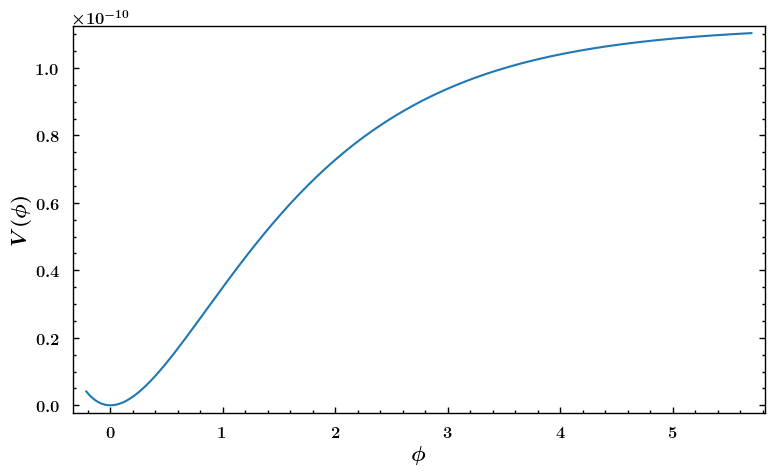

In [4]:
potential.plot_potential(min(phi), max(phi), dpi = 100, save= True)

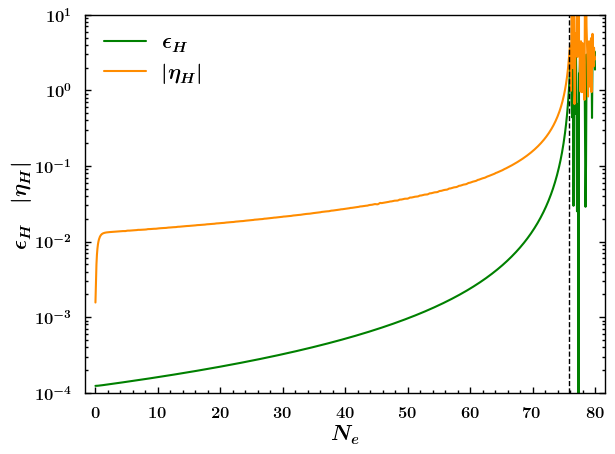

In [5]:
plt.plot(N, eps_H, label = r'$\epsilon_H$', color = 'green' )
plt.plot(N, abs(eta_H), label = r'$|\eta_H |$', color = 'darkorange')
plt.axvline(Nend, linewidth = 1, linestyle = 'dashed', color = 'k')


plt.yscale('log')
plt.ylim(1e-4, 10)
plt.xlabel(r'$N_e$')
plt.ylabel(r'$\epsilon_H\quad |\eta_H|$')
plt.legend(loc = 'best')
#plt.title('Slow-roll parameters')
plt.tight_layout()


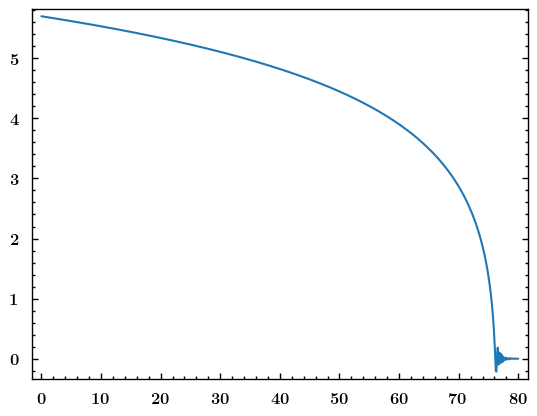

In [6]:
plt.plot(N, phi)

In [7]:
pert = Perturbations(potential, background, scale= 'CMB', N_CMB = 57.66)
k_pivot = pert.k_CMB
Npivot = pert.N_hc(k = k_pivot)
print(f'El modo {k_pivot} cruza el horizonte a {Npivot} e-folds')
sol = pert.solver()


El modo 0.05 cruza el horizonte a (18.17583583583583, 0.05) e-folds


In [8]:
#Extrayendo datos de la clase perturbations

variables = ['N', 'R_re', 'dRdN_re','R_im', 'dRdN_im', 
                'h_re', 'dhdN_re', 'h_im', 'dhdN_im','P_s', 'P_t', 'P_s_pivot', 'P_t_pivot', 'r_pivot']
N, R_re, dRdN_re, R_im, dRdN_im, h_re, dhdN_re, h_im, dhdN_im, P_s, P_t, P_s_pivot, P_t_pivot, r_pivot = (pert.data[i] for i in variables)


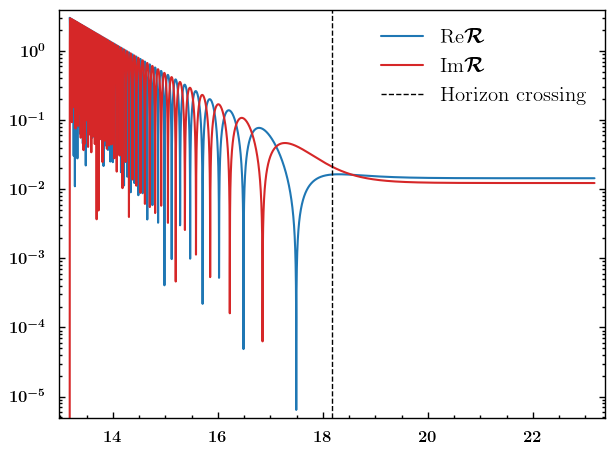

In [9]:
plt.semilogy(N, abs(R_re), label = r'$\text{Re}\mathcal{R}$')
plt.semilogy(N, abs(R_im), label = r'$\text{Im}\mathcal{R}$')
plt.axvline(Npivot[0], linewidth = 1, linestyle = 'dashed', color = 'k', label = 'Horizon crossing')
plt.tight_layout()
plt.legend()


In [10]:
P_s_pivot, P_t_pivot, r_pivot

(2.271075760109058e-09, 7.372942338459659e-12, 0.003246453715003152)

In [11]:
PS = pert.Power_spectrum(save= True)

/Users/flaviopineda/Desktop/primordialpy/primordialpy/perturbations.py:569: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='best')


Figure saved as: Figures/spectrum_scalar.png


<Figure size 800x500 with 0 Axes>

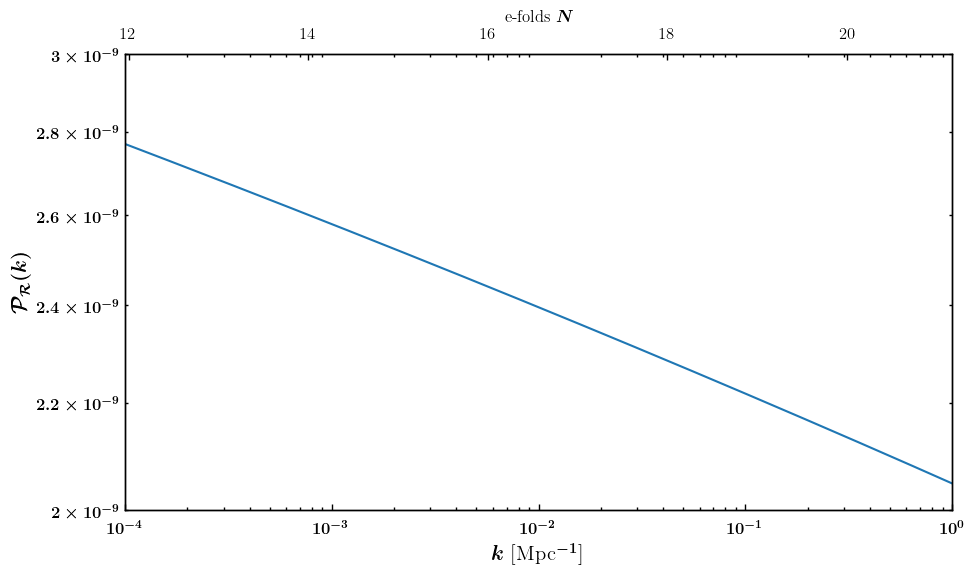

In [12]:
pert.Plot_spectrum(dpi = 100, spectrum = 'scalar', save=True)

Figure saved as: Figures/tensor_to_scalar_ratio.png


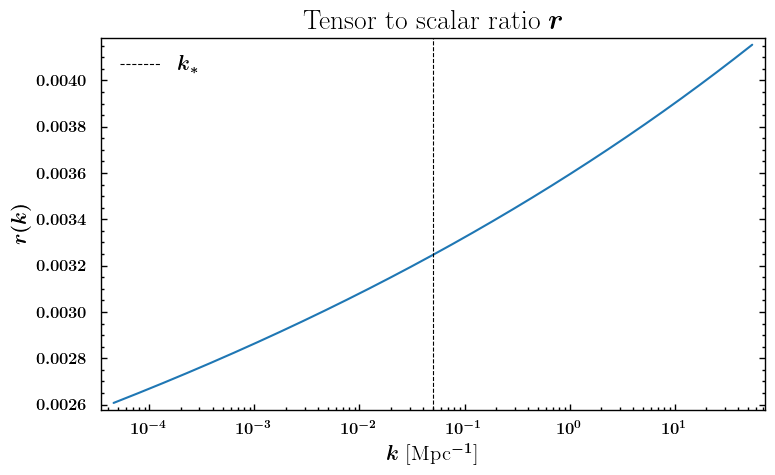

In [13]:
pert.Plot_r(dpi = 100, save=True)


In [14]:
print(pert.Spectral_tilts)

{'n_s': 0.9663736659958925, 'n_t': -0.0005046155624557863}
